# Lekce 4

## Korelace

Královna Ada tentokrát řeší další otázku. V jejím království existuje velké množství avokádových plantáží.

<div>
<img src="statistika-2-assets/ada_01.webp" width="500"/>
</div>


V různých letech a na různých místech její země roste každý rok jiné množství avokád. Ada si myslí, že velikost úrody souvisí s množstvím srážek, a tak zadá za úkol svým poradcům sesbírat data o množství srážek a velikosti úrody za posledních několik let v různých místech jejího království. V datech máme i další sloupečky, ale na ty se podíváme později.

<div>
<img src="statistika-2-assets/ada_02.webp" width="500"/>
</div>

Pojďme se na data podívat.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools as tools
import matplotlib.pyplot as plt


data = pd.read_csv("avocado_farming_data.csv")
data = data[["rainfall", "avocado_yield"]]
data.head()

,rainfall,avocado_yield
0,1099.342831,339.609970
1,972.347140,378.858209
2,1129.537708,316.857172
3,1304.605971,345.757449
4,953.169325,307.513138


K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme množství srážek a na svislé ose velikost úrody v každém čase a místě. Vidíme, že úroda má tendenci růst s tím, jak rostou srážky. Současně je patrný možný vliv dalších faktorů a také náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

Pozn.: Pozor na to, že v řadě případů je závislost lineární pouze v nějakém rozsahu. Např. pří extrémně vysokých srážkách by úroda mohla začít i klesat, protože kvůli extrémním dešťům může například úroda plesnivět. My ale takové situace v datech nemáme.

<Axes: xlabel='rainfall', ylabel='avocado_yield'>

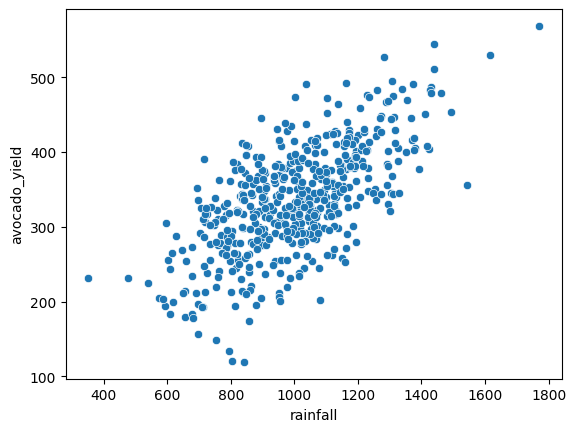

In [2]:
sns.scatterplot(data=data, x="rainfall", y="avocado_yield")

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Přímá nezávislost by mohla být např. mezi množstvím extrémně horkých dnů a úrodou. Čím více dní v roce je extrémní horko, tím menší bude úroda. To samé může platit např. pro množství mrazivých nocí pozdě na jaře atd.

<div>
<img src="statistika-2-assets/ada_03.webp" width="500"/>
</div>

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.

In [3]:
data.corr()

,rainfall,avocado_yield
rainfall,1.000000,0.657898
avocado_yield,0.657898,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují.

Uvažujme například úrodu avokád a úrodu melounů v blízké oblasti. Oba druhy ovoce vyžadují dostečné srážky, takže úroda obou druhů ovoce bude někdy vysoká (pokud jsou dostatečné srážky) a současně nízká (pokud nejsou dostatečné srážky). To ale neznamená, že se ovlivňují vzájemně. Ve skutečnosti to způsobuje společný faktor (srážky).

<div>
<img src="statistika-2-assets/ada_04.webp" width="500"/>
</div>

Občas nemusí být ani zřejmé, která proměnná ovlivňuje kterou proměnnou.

## Statistický test významnosti korelace

Korelaci můžeme testovat i statisticky. Využít můžeme test založený na Personově korelačním koeficientu (pokud data mají normální rozdělení) nebo test založení na Kenallově Tau (pokud data nemají normlní rozdělení).

Hypotéy testu jsou:

* H0: Mezi dvěma proměnnými neexistuje korelace (tj. koeficient korelace pro *kompletní* dataset je 0).
* H1: Mezi dvěma proměnnými existuje korelace (tj. koeficient korelace pro *kompletní* dataset není 0).

Testování můžeme provádět např. při využití hladiny významnosti 0.05.

Níže je vyýpočet používající Pearsonův koeficient (tj. předpokládáme, že data mají normální rozdělení).

In [4]:
stats.pearsonr(data["rainfall"], data["avocado_yield"])

PearsonRResult(statistic=np.float64(0.6578977104740032), pvalue=np.float64(2.561725310246105e-63))

Pro Kendallovo Tau předpoklad normality dat nepotřebujeme.

In [5]:
stats.kendalltau(data["rainfall"], data["avocado_yield"])

SignificanceResult(statistic=np.float64(0.4424849699398797), pvalue=np.float64(1.70915238079311e-49))

## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi množstvím srážek a velikostí úrody sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. U regrese vždy rozlušujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou množství srážek a závislou velikost úrody. Tvrdíme totiž, že množství srážek ovlivňuje velikost úrody avokád.

<div>
<img src="statistika-2-assets/ada_05.webp" width="500"/>
</div>

Musíme si uvědomit, že výslednou úrodu ovlivňují i další vlivy - například kvalita půdy, množství slunečního svitu, péče farmářů atd. Z toho důvodu neleží všechny body na regresní křivce, ale pohybují se kolem ní.

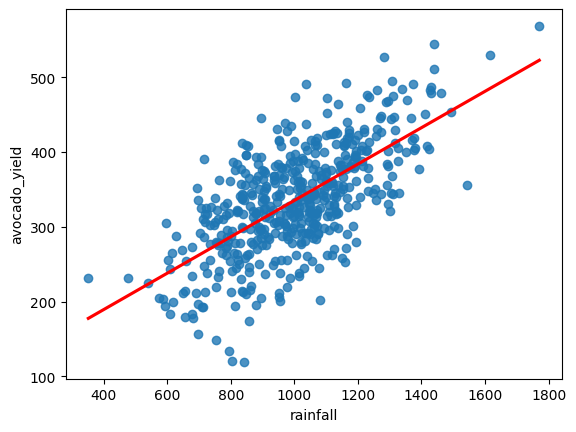

In [6]:
g = sns.regplot(data=data, x="rainfall", y="avocado_yield", line_kws={"color": "red"}, ci=None)

Pomocí této funkce dokážeme predikovat, kolik jaká bude úroda avokád podle množství srážek, a můžeme tedy předem plánovat dovoz nebo naopak plánovat vývoz.

<div>
<img src="statistika-2-assets/ada_10.webp" width="500"/>
</div>

Tato funkce je označovaná jako "lineární" a k jejímu vykreslení potřebujeme znát dvě hodnoty. Tyto hodnoty často nemají praktický význam, jak uvidíme níže, pro sestavení funkce jsou ale důležité.

- První je hodnota, která určuje, kde leží průsečík regresní funkce se svislou osou (osou *y*). V našem případě jde o hodnotu, která udává množství avokád, která by se teoreticky urodila při nulových srážkách.
- Druhá je hodnota, která udává sklon funkce. Čím bude hodnota vyšší, tím více skloněná funkce bude. V našem případě toto číslo určí, o kolik se v průměru zvýší úroda avokád díky dalšímu milimetru srážek.

K zobrazení těchto hodnot můžeme použít modul *statmodels*. Ten zobrazí velkou tabulku se spoustou čísel, nás však budou zajímat pouze některá.

In [7]:
res = smf.ols(formula="avocado_yield  ~ rainfall", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          avocado_yield   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     380.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.56e-63
Time:                        17:28:16   Log-Likelihood:                -2709.3
No. Observations:                 500   AIC:                             5423.
Df Residuals:                     498   BIC:                             5431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.0281     12.729      7.230      0.000      67.019     117.037
rainfall       0.2432      0.012     19.495      0.000       0.219       0.268
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.178
Skew:                          -0.161   Prob(JB):                        0.337
Kurtosis:                       2.965   Cond. No.                     5.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podívejme se nejprve na dvě čísla (koeficienty - *coefficients*), která potřebujeme k nakreslení naší funkce:

- V řádku `intercept` máme hodnotu, která určuje, kde funkce protne se svislou osou.
- V řádku `rainfall` máme hodnotu, která udává sklon funkce.

Pokud bychom chtěli odhadnout úrodu avokád na základě množství srážek, můžeme použít metodu `predict()`.

In [8]:
new_data = pd.DataFrame({"rainfall": [100]})
predicted_yield = res.predict(new_data)
predicted_yield

0    116.346713
dtype: float64

### Vyhodnocení kvality modelu

Regresní model nevysvětlí data dokonale. Jak jsme si již řekli, na vysvětlovanou proměnnou působí další vlivy, které v datech nemáme. Regresní modely se mezi sebou liší podle toho, jak dobře vysvětlovanou proměnnou dokážou vysvětlit. Abychom tuto skutečnost dokázali vysvětlit, vznikl ukazatel označovaný jako koeficient determinace (*coefficient of determination*, *R-squared*). Ten říká, kolik procent variability (různorodosti) vysvětlované proměnné (v našem případě známky z testu) dokážeme pomocí našeho modelu vysvětlit. Koeficient determinace je číslo mezi 0 a 1 a platí, že čím vyšší koeficient determinace je, tím lépe náš model naše data popisuje.

Model se v matematických vzorcích často značí $R^2$, v naší tabulce je označen jako `R-squared`.

### Přidání dalších proměnných

Zkusme nyní do modelu přidat další proměnné. Proměnné přidáme napravo od symbolu `~`.

Do regresního modelu můžeme přidat i tzv. kategoriální (`str`) proměnné. Ty musíme označit pomocí funkce `C()`.

In [9]:
data = pd.read_csv("avocado_farming_data.csv")
res = smf.ols(formula="avocado_yield  ~ rainfall + sunlight + soil_moisture + pests + C(regions)", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          avocado_yield   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     418.5
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          7.48e-190
Time:                        17:28:16   Log-Likelihood:                -2399.3
No. Observations:                 500   AIC:                             4813.
Df Residuals:                     493   BIC:                             4842.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -33.8790     15.160     -2.235      0.026     -63.665      -4.093
C(regions)[T.South]    80.8552      3.298     24.518      0.000      74.376      87.335
C(regions)[T.West]     55.1330      3.175     17.362      0.000      48.894      61.372
rainfall                0.2565      0.007     37.829      0.000       0.243       0.270
sunlight               11.0252      1.361      8.099      0.000       8.350      13.700
soil_moisture           0.5777      0.132      4.386      0.000       0.319       0.836
pests                  -5.1215      0.227    -22.611      0.000      -5.566      -4.676
==============================================================================
Omnibus:                        1.792   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.823
Skew:                           0.144   Prob(JB):                        0.402
Kurtosis:                       2.935   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

U množství škůdců (sloupec `pests`) vidíme zápornýkoeficient. To znamená, že čím vyšší hodnota je v tomto sloupci, tím nižší je výsledná úroda.

<div>
<img src="statistika-2-assets/ada_11.webp" width="500"/>
</div>

### Bonus: Test hypotézy o statistické významnosti koeficientu

S regresí souvisí řada testů statistických hypotéz. Jedním z nich je test statistické významnosti regresního koeficientu. Ten se hodí hlavně v případě, kdy máme koeficientů více a zajímá nás, které má smysl v modelu používat.

Test má následující hypotézy:

- H0: Koeficient je statisticky nevýznamný.
- H1: Koeficient je statisticky významný.

Pokud je p-hodnota testu méně než 0.05, můžeme tedy koeficient označit jako statisticky významný. p-hodnotu testu najdeme ve sloupci `P>|t|`. p-hodnotu máme pro každý koeficient zvlášť. V našem případě platí, že koeficient `Intercept` je statisticky nevýznamný a všechny ostatní koeficienty jsou statisticky významné.

# Cvičení

## Kvalita betonu

V souboru [Concrete_Data_Yeh.csv](Concrete_Data_Yeh.csv) najdeš informace o kvalitě betonu. Sloupce 1-7 udávají množství jednotlivých složek v kg, které byly přimíchány do krychlového metru betonu (např. cement, voda, kamenivo, písek atd.). Ve sloupci 8 je stáří betonu a ve sloupci 9 kompresní síla betonu v megapascalech. Vytvoř regresní model, který bude predikovat kompresní sílu betonu na základě všech množství jednotlivých složek a jeho stáří. Zhodnoť kvalitu modelu.

### Bonus

K vyřešení tohoto bonusu je potřeba pročíst si část *Bonus: Test hypotézy o statistické významnosti koeficientu*.

Která ze složek betonu ovlivňuje sílu betonu negativně (tj. má záporný regresní koeficient)?

Video s řešením příkladu je [zde](https://youtu.be/iGXlEpf0yb4).

## Bonus: Pojišťovna

V souboru [expenses.csv](expenses.csv) najdeš informace o platbách za pojištěnce jedné pojišťovny: věk, pohlaví, BMI (index počítaný jako hmotnost dělená výškou), počet dětí, kuřák/nekuřák, region a platby za pojištěnce. 

Vytvoř regresní model, který odhadne platby za pojištěnce na základě jeho věku, indexu BMI, pohlaví a tom, zda jde o kuřáka (kuřačku).

### Odlehlá pozorování

V případě regrese často můžeme narazit na problémy, které souvisí s daty, které máme k dispozici. Uvažujme například dataset s extrémě úspěšnými farmami [avocado_farming_data_outlier.csv](avocado_farming_data_outlier.csv). 

Odlehlá pozorování mohou mít mnoho příčin. Na některé farmě můžou být prostě farmáři pracovitější, takže mají větší úrodu.

<div>
<img src="statistika-2-assets/ada_06.webp" width="500"/>
</div>

Alternativně se může jednat o chyby při zadávání dat.

<div>
<img src="statistika-2-assets/ada_09.webp" width="500"/>
</div>

Případně i o podvody.

<div>
<img src="statistika-2-assets/ada_07.webp" width="500"/>
</div>

In [10]:
data = pd.read_csv("avocado_farming_data_outlier.csv")
data.head()

,rainfall,avocado_yield
0,1099.342831,278.163385
1,972.347140,208.556978
2,1129.537708,293.655367
3,1304.605971,308.132332
4,953.169325,229.541519


Vytvoříme si regresní graf. Na grafu jsou vidět body, které označujeme jako odlehlá pozorování. Tyto body ovlivňují sklon regresní funkce, sklon je mnohem menší, než by měl být.

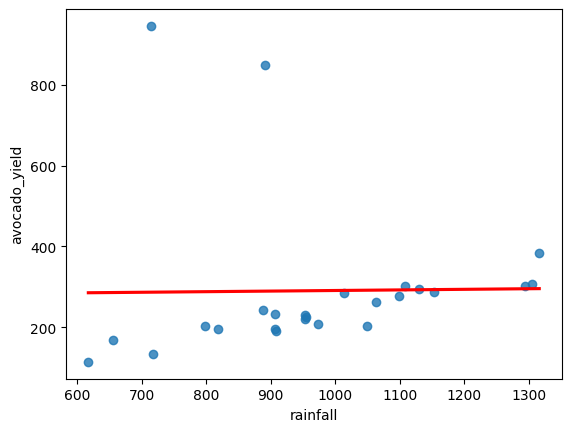

In [11]:
g = sns.regplot(data=data, x="rainfall", y="avocado_yield", line_kws={"color": "red"}, ci=None)

Podívejme se na krabicový graf.

<Axes: ylabel='avocado_yield'>

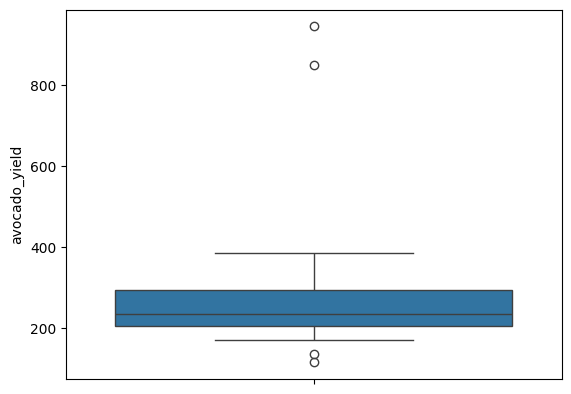

In [12]:
sns.boxplot(data, y="avocado_yield", whis=[5, 95])

Odlehlá pozorování můžeme z dat vyřadit, např. s využitím tzv. Cookovy vzdálenosti. My využijeme postup označovaný jako robustní regrese. Robustní regrese přikládá menší váhu odlehlým pozorováním, takže výrazně snižuje jejich vliv na regresní funkci.

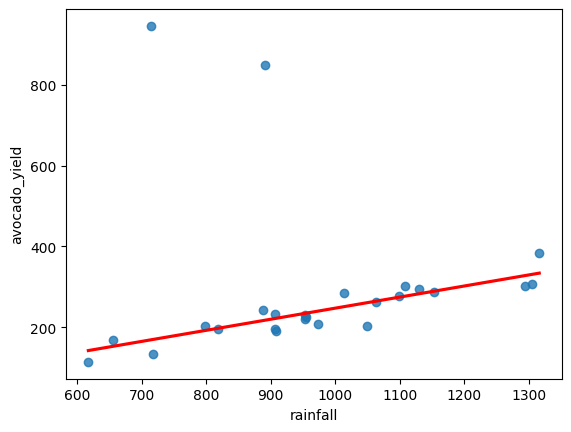

In [13]:
g = sns.regplot(data=data, x="rainfall", y="avocado_yield", line_kws={"color": "red"}, ci=None, robust=True)

In [14]:
formula = "avocado_yield ~ rainfall"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:          avocado_yield   No. Observations:                   25
Model:                            RLM   Df Residuals:                       23
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 20 Oct 2024                                         
Time:                        17:28:16                                         
No. Iterations:                    12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.5897     36.611     -0.726      0.468     -98.346      45.166
rainfall       0.2741      0.037      7.376      0.000       0.201       0.347
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

U robustní regrese většinou nepočítáme koeficient determinace. Je to z důvodu, že tento koeficient je počítaný jako druhá mocina rozdílu mezi predikovanou a skutečnou hodnotou. Odlehlá pozorování by tedy hodnotu koeficientu výrazně navýšila, zvláště v případě, kdy bychom na tato pozorování brali menší ohled a více se zaměřili na "běžné" hodnoty. Příklady měřítek, která mohou být použita k vyhodnocení regresního modelu, najdeš [v tomto článku](https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70). Kupříkladu průměrná absolutní chyba (*Mean Absolute Error (MAE)*) je absolutní hodnota rozdílu mezi predikovanou a skutečnou hodnotou. Absolutní hodnota zařídí, že na chybu je pohlíženo stejně, ať už model predikoval příliš vysokou nebo naopak příliš nízkou hodnotu. Protože tento ukazatel nepoužívá druhou mocninu, nedává odlehlým pozorováním nadproporciálně větší význam.

<div>
<img src="statistika-2-assets/ada_08.webp" width="500"/>
</div>

In [15]:
tools.eval_measures.meanabs(data["avocado_yield"], res.fittedvalues, axis=0)

np.float64(75.7682350434908)

# Cvičení

## Robustní regrese

Využij robustní regresi na dataset o kvalitě betonu a porovnej, zda došlo ke zmenám hodnot regresních koeficientů.